In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import datetime
import pandas as pd
import matplotlib.dates as mdates
import dask.array as da
import seaborn as sns
from metpy.calc import dewpoint_from_relative_humidity
from metpy.calc import specific_humidity_from_dewpoint
from metpy.units import units
import dask

/home/kit/imktro/gj5173/anaconda3/envs/newenvi4/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
########################################################################################## read er5 data #################################################################################################################################

In [1]:
ds_era = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/era5/2021.h5')

NameError: name 'xr' is not defined

In [2]:
ds_era

NameError: name 'ds_era' is not defined

In [4]:
ds_era5_t2m_na = ds_era.fields[656:737,2,260:40:-1,720:1200]#era5 06.14 00UTC to 07-04 00UTC; lat from 25Ndegree to 80N degree and lon from 180 degree to 60W degree

In [5]:
ds_era5_t2m_box_0614_0704 = ds_era5_t2m_na[:,61:141,194:274]#49N-59N,115w-125w

In [6]:
ds_era5_t2m_boxmean_0614_0704 = np.mean(ds_era5_t2m_box_0614_0704,axis=(-1,-2))

In [86]:
from datetime import datetime, timedelta

# Define start and end time
start_time = datetime(2021, 6, 14,12)
#end_time = datetime(2021, 7, 1)

# Generate time axis with 6-hour intervals
time_axis = [start_time + timedelta(hours=6*i) for i in range(79)]

In [87]:
time_axis

[datetime.datetime(2021, 6, 14, 18, 0),
 datetime.datetime(2021, 6, 15, 0, 0),
 datetime.datetime(2021, 6, 15, 6, 0),
 datetime.datetime(2021, 6, 15, 12, 0),
 datetime.datetime(2021, 6, 15, 18, 0),
 datetime.datetime(2021, 6, 16, 0, 0),
 datetime.datetime(2021, 6, 16, 6, 0),
 datetime.datetime(2021, 6, 16, 12, 0),
 datetime.datetime(2021, 6, 16, 18, 0),
 datetime.datetime(2021, 6, 17, 0, 0),
 datetime.datetime(2021, 6, 17, 6, 0),
 datetime.datetime(2021, 6, 17, 12, 0),
 datetime.datetime(2021, 6, 17, 18, 0),
 datetime.datetime(2021, 6, 18, 0, 0),
 datetime.datetime(2021, 6, 18, 6, 0),
 datetime.datetime(2021, 6, 18, 12, 0),
 datetime.datetime(2021, 6, 18, 18, 0),
 datetime.datetime(2021, 6, 19, 0, 0),
 datetime.datetime(2021, 6, 19, 6, 0),
 datetime.datetime(2021, 6, 19, 12, 0),
 datetime.datetime(2021, 6, 19, 18, 0),
 datetime.datetime(2021, 6, 20, 0, 0),
 datetime.datetime(2021, 6, 20, 6, 0),
 datetime.datetime(2021, 6, 20, 12, 0),
 datetime.datetime(2021, 6, 20, 18, 0),
 datetime.da

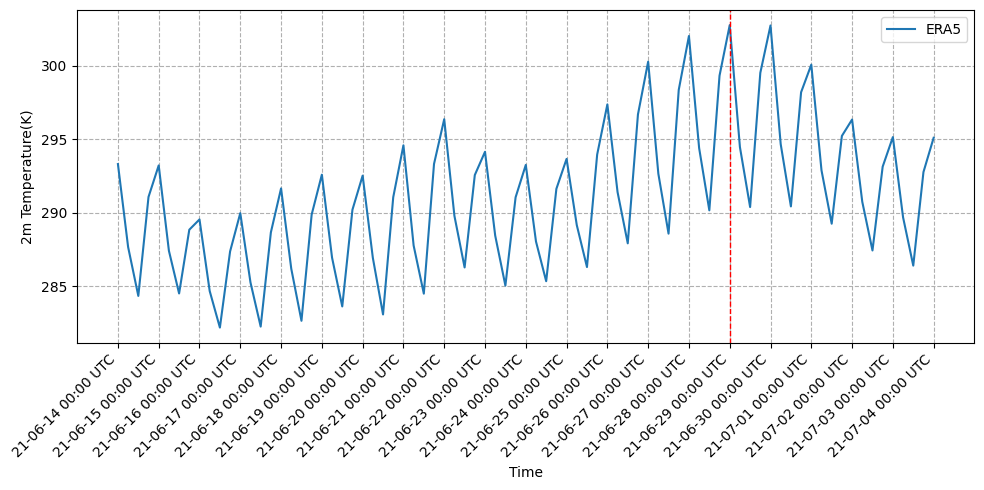

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(time_axis,ds_era5_t2m_boxmean_0614_0704,label='ERA5')
#plt.plot(time_axis[1:61],ds_fcnv2_ec_cf_2t_box_0614_mean,label = 'FCNV2_EC initialized on 14th of June',linewidth =1)
#plt.plot(time_axis[9:69],ds_fcnv2_ec_cf_2t_box_0616_mean,label = 'FCNV2_EC initialized on 16th of June',linewidth =1)
#plt.plot(time_axis[17:77],ds_fcnv2_ec_cf_2t_box_0618_mean,label = 'FCNV2_EC initialized on 18th of June')
#plt.plot(time_axis[25:81],ds_fcnv2_ec_cf_2t_box_0620_mean[0:56],label = 'FCNV2_EC initialized on 20th of June')
#plt.plot(time_axis[33:81],ds_fcnv2_ec_cf_2t_box_0622_mean[0:48],label = 'FCNV2_EC initialized on 22nd of June')
#plt.plot(time_axis[37:81],ds_fcnv2_ec_cf_2t_box_0623_mean[0:44],label = 'FCNV2_EC initialized on 23rd of June')
# Formatting x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Time')
plt.ylabel('2m Temperature(K)')

plt.xticks(rotation=45, ha='right')
tick_interval = 4  # hours
tick_locations = [time_axis[i] for i in range(0, len(time_axis), tick_interval)]
tick_labels = [tick.strftime('%y-%m-%d %H:%M UTC') for tick in tick_locations]
plt.xticks(tick_locations, tick_labels)
plt.grid(linestyle='--')
plt.legend()
plt.axvline(x=time_axis[60], color='red', linestyle='--',linewidth =1)
plt.tight_layout()
plt.savefig('/home/kit/imk-tro/gj5173/diurnal_cycle/big_box_18_23.06_t2m_fcnv2_ec.png')
plt.show()

In [77]:
#################take the moving average of era5 ####################
data = ds_era5_t2m_boxmean_0614_0704
window = 3
ds_era5_t2m_boxmean_0614_0704_ave = []
for ind in range(len(data) - window + 1):
     ds_era5_t2m_boxmean_0614_0704_ave.append(np.mean(data[ind:ind+window]))

In [88]:
data = ds_era5_t2m_boxmean_0614_0704
window = 3
ds_era5_t2m_boxmean_0614_0704_ave = []

# Calculate moving average
for ind in range(len(data) - window + 1):
    window_data = data[ind:ind+window]
    window_mean = np.mean(window_data)
    ds_era5_t2m_boxmean_0614_0704_ave.append(window_mean)

# Convert the result to a numpy array
ds_era5_t2m_boxmean_0614_0704_ave = np.array(ds_era5_t2m_boxmean_0614_0704_ave)

In [89]:
np.shape(ds_era5_t2m_boxmean_0614_0704_ave)

(79,)

In [78]:
np.shape(ds_era5_t2m_boxmean_0614_0704_ave)

(79,)

In [79]:
ds_era5_t2m_boxmean_0614_0704

<xarray.DataArray 'fields' (phony_dim_0: 81)>
array([293.2984 , 287.65372, 284.32983, 291.06207, 293.2071 , 287.40137,
       284.4952 , 288.83167, 289.5321 , 284.6627 , 282.1748 , 287.35306,
       289.96033, 285.2457 , 282.24387, 288.64993, 291.6434 , 286.17902,
       282.63776, 289.86038, 292.57724, 286.93216, 283.61462, 290.19186,
       292.51147, 286.92188, 283.06967, 291.0414 , 294.57422, 287.75873,
       284.48395, 293.3055 , 296.3486 , 289.7782 , 286.26648, 292.55106,
       294.13266, 288.4337 , 285.03223, 291.03635, 293.23978, 288.03204,
       285.329  , 291.61307, 293.64944, 289.14832, 286.29413, 293.9432 ,
       297.35574, 291.3925 , 287.90634, 296.67297, 300.2614 , 292.64212,
       288.56494, 298.34286, 302.0082 , 294.38596, 290.15042, 299.30945,
       302.749  , 294.45447, 290.3747 , 299.5027 , 302.72513, 294.65118,
       290.41757, 298.1833 , 300.05908, 292.8747 , 289.24188, 295.21082,
       296.32693, 290.73   , 287.42175, 293.1212 , 295.1329 , 289.67902,
       286.39136, 292.75436, 295.08804], dtype=float32)
Dimensions without coordinates: phony_dim_0

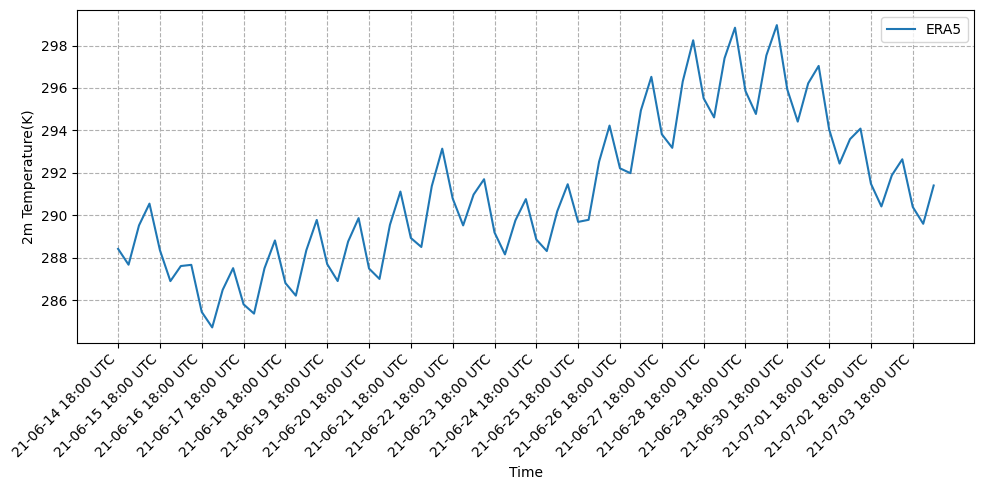

In [90]:
plt.figure(figsize=(10, 5))
plt.plot(time_axis,ds_era5_t2m_boxmean_0614_0704_ave,label='ERA5')
#plt.plot(time_axis[1:61],ds_fcnv2_ec_cf_2t_box_0614_mean,label = 'FCNV2_EC initialized on 14th of June',linewidth =1)
#plt.plot(time_axis[9:69],ds_fcnv2_ec_cf_2t_box_0616_mean,label = 'FCNV2_EC initialized on 16th of June',linewidth =1)
#plt.plot(time_axis[17:77],ds_fcnv2_ec_cf_2t_box_0618_mean,label = 'FCNV2_EC initialized on 18th of June')
#plt.plot(time_axis[25:81],ds_fcnv2_ec_cf_2t_box_0620_mean[0:56],label = 'FCNV2_EC initialized on 20th of June')
#plt.plot(time_axis[33:81],ds_fcnv2_ec_cf_2t_box_0622_mean[0:48],label = 'FCNV2_EC initialized on 22nd of June')
#plt.plot(time_axis[37:81],ds_fcnv2_ec_cf_2t_box_0623_mean[0:44],label = 'FCNV2_EC initialized on 23rd of June')
# Formatting x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Time')
plt.ylabel('2m Temperature(K)')

plt.xticks(rotation=45, ha='right')
tick_interval = 4  # hours
tick_locations = [time_axis[i] for i in range(0, len(time_axis), tick_interval)]
tick_labels = [tick.strftime('%y-%m-%d %H:%M UTC') for tick in tick_locations]
plt.xticks(tick_locations, tick_labels)
plt.grid(linestyle='--')
plt.legend()
#plt.axvline(x=time_axis[60], color='red', linestyle='--',linewidth =1)
plt.tight_layout()
#plt.savefig('/home/kit/imk-tro/gj5173/diurnal_cycle/big_box_18_23.06_t2m_fcnv2_ec.png')
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(time_axis,ds_era5_t2m_boxmean_0614_0704,label='ERA5')
#plt.plot(time_axis[1:61],ds_fcnv2_ec_cf_2t_box_0614_mean,label = 'FCNV2_EC initialized on 14th of June',linewidth =1)
#plt.plot(time_axis[9:69],ds_fcnv2_ec_cf_2t_box_0616_mean,label = 'FCNV2_EC initialized on 16th of June',linewidth =1)
#plt.plot(time_axis[17:77],ds_fcnv2_ec_cf_2t_box_0618_mean,label = 'FCNV2_EC initialized on 18th of June')
#plt.plot(time_axis[25:81],ds_fcnv2_ec_cf_2t_box_0620_mean[0:56],label = 'FCNV2_EC initialized on 20th of June')
#plt.plot(time_axis[33:81],ds_fcnv2_ec_cf_2t_box_0622_mean[0:48],label = 'FCNV2_EC initialized on 22nd of June')
#plt.plot(time_axis[37:81],ds_fcnv2_ec_cf_2t_box_0623_mean[0:44],label = 'FCNV2_EC initialized on 23rd of June')
# Formatting x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Time')
plt.ylabel('2m Temperature(K)')

plt.xticks(rotation=45, ha='right')
tick_interval = 4  # hours
tick_locations = [time_axis[i] for i in range(0, len(time_axis), tick_interval)]
tick_labels = [tick.strftime('%y-%m-%d %H:%M UTC') for tick in tick_locations]
plt.xticks(tick_locations, tick_labels)
plt.grid(linestyle='--')
plt.legend()
plt.axvline(x=time_axis[60], color='red', linestyle='--',linewidth =1)
plt.tight_layout()
plt.savefig('/home/kit/imk-tro/gj5173/diurnal_cycle/big_box_18_23.06_t2m_fcnv2_ec.png')
plt.show()

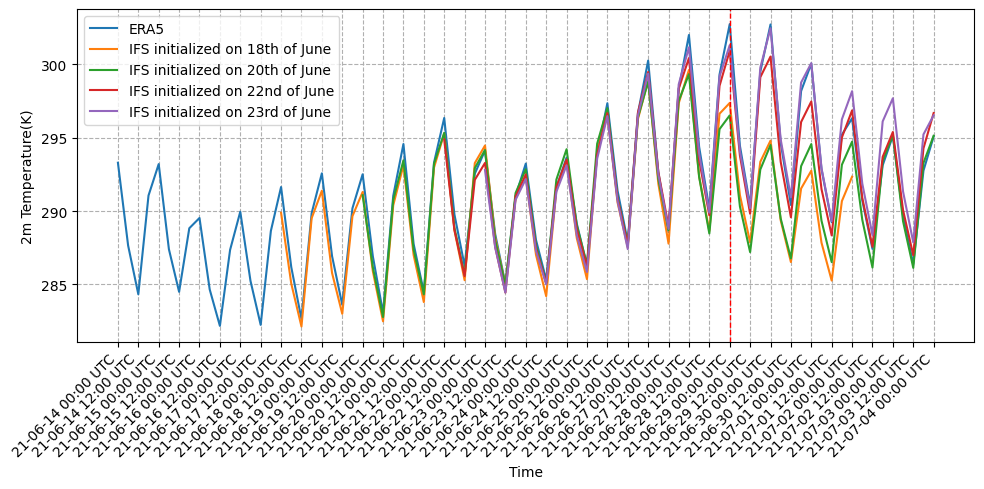

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(time_axis,ds_era5_t2m_boxmean_0614_0704,label='ERA5')
#plt.plot(time_axis[0:57],ds_ec_t2m_box_mean_0614,label = 'IFS initialized on 14th of June')
#plt.plot(time_axis[8:65],ds_ec_t2m_box_mean_0616,label = 'IFS initialized on 16th of June')
plt.plot(time_axis[16:73],ds_ec_t2m_box_mean_0618,label = 'IFS initialized on 18th of June')
plt.plot(time_axis[24:81],ds_ec_t2m_box_mean_0620,label = 'IFS initialized on 20th of June')
plt.plot(time_axis[32:81],ds_ec_t2m_box_mean_0622[0:49],label = 'IFS initialized on 22nd of June')
plt.plot(time_axis[36:81],ds_ec_t2m_box_mean_0623[0:45],label = 'IFS initialized on 23rd of June')
# Formatting x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Time')
plt.ylabel('2m Temperature(K)')

plt.xticks(rotation=45, ha='right')
tick_interval = 2  # hours
tick_locations = [time_axis[i] for i in range(0, len(time_axis), tick_interval)]
tick_labels = [tick.strftime('%y-%m-%d %H:%M UTC') for tick in tick_locations]
plt.xticks(tick_locations, tick_labels)
plt.grid(linestyle='--')
plt.legend()
plt.axvline(x=time_axis[60], color='red', linestyle='--',linewidth =1)
plt.savefig('/home/kit/imk-tro/gj5173/diurnal_cycle/big_box_18_23.06_t2m_ifs.png')
plt.tight_layout()
plt.show()

In [31]:
ds_ec_t2m_box_mean_0616

<xarray.DataArray (dim_1: 57)>
array([288.3087 , 283.8899 , 281.55707, 286.80414, 288.77576, 284.2123 ,
       281.51202, 288.36093, 290.27786, 285.0383 , 282.01285, 289.5036 ,
       291.54214, 285.8371 , 282.74048, 289.90933, 291.71027, 285.99847,
       282.4978 , 290.74023, 293.35226, 287.4348 , 284.66348, 292.0902 ,
       293.71844, 287.50323, 284.29663, 291.11667, 292.62494, 286.80963,
       283.81305, 289.61923, 290.7874 , 285.97568, 283.06415, 290.2466 ,
       291.93207, 286.9152 , 283.9076 , 292.33212, 294.16782, 288.50772,
       285.2949 , 293.51672, 295.94653, 289.7041 , 286.39468, 294.54327,
       296.77975, 290.18167, 286.85538, 292.7941 , 293.50085, 288.3511 ,
       285.71738, 291.6278 , 293.80847], dtype=float32)
Dimensions without coordinates: dim_1

In [ ]:
############################ calculate the running mean (moving average)#####################################################################################

In [40]:
data = ds_ec_t2m_box_mean_0616
window = 5
ds_ec_t2m_box_mean_0616_ave = []
for ind in range(len(data) - window + 1):
     ds_ec_t2m_box_mean_0616_ave.append(np.mean(data[ind:ind+window]))

ValueError: x and y must have same first dimension, but have shapes (57,) and (53,)

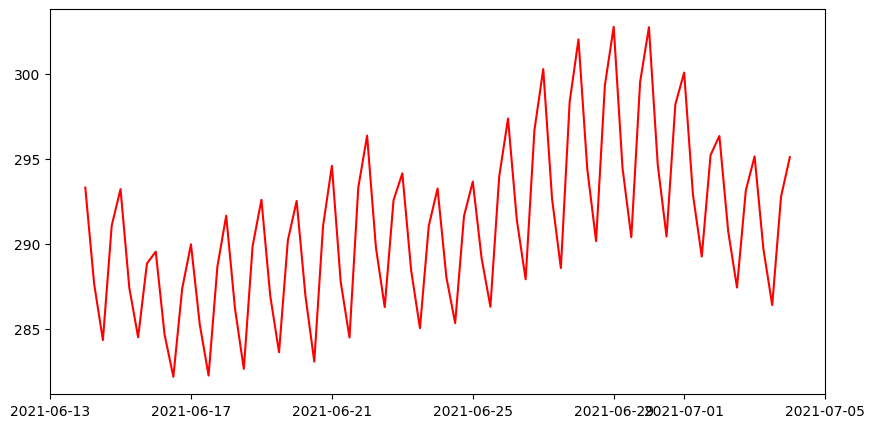

In [41]:
plt.figure(figsize=(10, 5))
plt.plot(time_axis,ds_era5_t2m_boxmean_0614_0704,label='ERA5',color='red')
#plt.plot(time_axis[0:57],ds_ec_t2m_box_mean_0614,label = 'IFS initialized on 14th of June')
#plt.plot(time_axis[1:61],ds_fcnv2_ec_cf_2t_box_0614_mean,label = 'FCNV2_EC initialized on 14th of June')
plt.plot(time_axis[8:65],ds_ec_t2m_box_mean_0616_ave,label = 'IFS initialized on 16th of June',color='black')
plt.plot(time_axis[9:69],ds_fcnv2_ec_cf_2t_box_0616_mean,label = 'FCNV2_EC initialized on 16th of June',linestyle='--',color='black')
#plt.plot(time_axis[16:73],ds_ec_t2m_box_mean_0618,label = 'IFS initialized on 18th of June',color='black')
#plt.plot(time_axis[17:77],ds_fcnv2_ec_cf_2t_box_0618_mean,label = 'FCNV2_EC initialized on 18th of June',linestyle='--',color='black')
#plt.plot(time_axis[24:81],ds_ec_t2m_box_mean_0620,label = 'IFS initialized on 20th of June',color='black')
#plt.plot(time_axis[25:81],ds_fcnv2_ec_cf_2t_box_0620_mean[0:56],label = 'FCNV2_EC initialized on 20th of June',linestyle='--',color='black')
#plt.plot(time_axis[32:81],ds_ec_t2m_box_mean_0622[0:49],label = 'IFS initialized on 22nd of June',color='black')
#plt.plot(time_axis[33:81],ds_fcnv2_ec_cf_2t_box_0622_mean[0:48],label = 'FCNV2_EC initialized on 22nd of June',linestyle='--',color='black')
#plt.plot(time_axis[36:81],ds_ec_t2m_box_mean_0623[0:45],label = 'IFS initialized on 23rd of June',color='black')
#plt.plot(time_axis[37:81],ds_fcnv2_ec_cf_2t_box_0623_mean[0:44],label = 'FCNV2_EC initialized on 23rd of June',linestyle='--',color='black')
# Formatting x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Time')
plt.ylabel('2m Temperature(K)')

plt.xticks(rotation=45, ha='right')
tick_interval = 2  # hours
tick_locations = [time_axis[i] for i in range(0, len(time_axis), tick_interval)]
tick_labels = [tick.strftime('%y-%m-%d %H:%M UTC') for tick in tick_locations]
plt.xticks(tick_locations, tick_labels)
plt.yticks(np.arange(280, 305, 1))
plt.grid(linestyle='--')
plt.legend()
plt.axvline(x=time_axis[60], color='red', linestyle='--',linewidth =1)
#plt.savefig('/home/kit/imk-tro/gj5173/diurnal_cycle/big_box_16.06_t2m.png')
plt.tight_layout()
plt.show()

In [ ]:
################################################################ read fcnv2_ec data #####################################################################################################

In [10]:
def read_fcnv2_forecast(date_str, dataset_type):
    # Define base directories and filename patterns based on dataset type
    base_directory = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/'
    if dataset_type == 'ec':
        filename_pattern = f'fcnv2_fc_ifs_{date_str}_0000_m0.nc'
        dataset_directory = 'ifs'
    elif dataset_type == 'era':
        filename_pattern = f'fcnv2_fc_era5_{date_str}_0000_m0.nc'
        dataset_directory = 'era5'
    else:
        print(f"Invalid dataset type: {dataset_type}")
        return None

    # Construct the full path
    file_path = os.path.join(base_directory, dataset_directory, date_str, 'forecasts', filename_pattern)

    # Check if the file exists
    if os.path.exists(file_path):
        # Read the dataset using xarray
        ds = xr.open_dataset(file_path, engine='netcdf4')
        return ds
    else:
        print(f"File not found: {file_path}")
        return None

In [11]:
#read data from 2021-06-14 to 2021-06-24
date_range = pd.date_range(start='2021-06-14', end='2021-06-29', freq='D')
ds_fcnv2_ec = []

for date in date_range:
    date_str = date.strftime('%Y-%m-%d')  # Convert datetime to string
    ds = read_fcnv2_forecast(date_str,'ec')
    if ds is not None:
        ds_fcnv2_ec.append(ds)

In [12]:
ds_fcnv2_ec_cf_2t_na_0614 = ds_fcnv2_ec[0]['2t'][:,0,40:260,720:1200]
ds_fcnv2_ec_cf_2t_box_0614 = ds_fcnv2_ec_cf_2t_na_0614[:,79:159,194:274]
ds_fcnv2_ec_cf_2t_box_0614_mean = np.mean(ds_fcnv2_ec_cf_2t_box_0614,axis=(-1,-2))

ds_fcnv2_ec_cf_2t_na_0616 = ds_fcnv2_ec[2]['2t'][:,0,40:260,720:1200]
ds_fcnv2_ec_cf_2t_box_0616 = ds_fcnv2_ec_cf_2t_na_0616[:,79:159,194:274]
ds_fcnv2_ec_cf_2t_box_0616_mean = np.mean(ds_fcnv2_ec_cf_2t_box_0616,axis=(-1,-2))

ds_fcnv2_ec_cf_2t_na_0618 = ds_fcnv2_ec[4]['2t'][:,0,40:260,720:1200]
ds_fcnv2_ec_cf_2t_box_0618 = ds_fcnv2_ec_cf_2t_na_0618[:,79:159,194:274]
ds_fcnv2_ec_cf_2t_box_0618_mean = np.mean(ds_fcnv2_ec_cf_2t_box_0618,axis=(-1,-2))

ds_fcnv2_ec_cf_2t_na_0620 = ds_fcnv2_ec[6]['2t'][:,0,40:260,720:1200]
ds_fcnv2_ec_cf_2t_box_0620 = ds_fcnv2_ec_cf_2t_na_0620[:,79:159,194:274]
ds_fcnv2_ec_cf_2t_box_0620_mean = np.mean(ds_fcnv2_ec_cf_2t_box_0620,axis=(-1,-2))

ds_fcnv2_ec_cf_2t_na_0622 = ds_fcnv2_ec[8]['2t'][:,0,40:260,720:1200]
ds_fcnv2_ec_cf_2t_box_0622 = ds_fcnv2_ec_cf_2t_na_0622[:,79:159,194:274]
ds_fcnv2_ec_cf_2t_box_0622_mean = np.mean(ds_fcnv2_ec_cf_2t_box_0622,axis=(-1,-2))

ds_fcnv2_ec_cf_2t_na_0623 = ds_fcnv2_ec[9]['2t'][:,0,40:260,720:1200]
ds_fcnv2_ec_cf_2t_box_0623 = ds_fcnv2_ec_cf_2t_na_0623[:,79:159,194:274]
ds_fcnv2_ec_cf_2t_box_0623_mean = np.mean(ds_fcnv2_ec_cf_2t_box_0623,axis=(-1,-2))


In [13]:
ds_fcnv2_ec_cf_2t_box_0623_mean

<xarray.DataArray '2t' (time: 60)>
array([288.25113, 285.06525, 291.221  , 293.0508 , 287.81464, 285.22995,
       291.5095 , 293.73212, 288.79028, 286.1409 , 293.4038 , 296.5753 ,
       290.3931 , 286.89737, 295.7403 , 299.09387, 291.64212, 287.51526,
       297.31693, 300.64136, 292.83994, 288.58148, 298.18332, 301.20633,
       293.5066 , 289.3763 , 298.17297, 300.33102, 293.20544, 289.40073,
       296.86267, 298.65277, 291.73758, 288.04767, 294.50558, 296.05792,
       289.90665, 286.74344, 293.25595, 295.4032 , 289.4307 , 286.33914,
       292.23926, 293.70804, 287.64703, 284.2672 , 289.79575, 291.46155,
       285.94824, 282.79504, 288.66602, 290.66202, 285.50986, 282.5579 ,
       288.89093, 291.22995, 286.00375, 283.17627, 289.45676, 291.2409 ],
      dtype=float32)
Coordinates:
  * time      (time) datetime64[ns] 2021-06-23T06:00:00 ... 2021-07-08
    height_3  float64 2.0

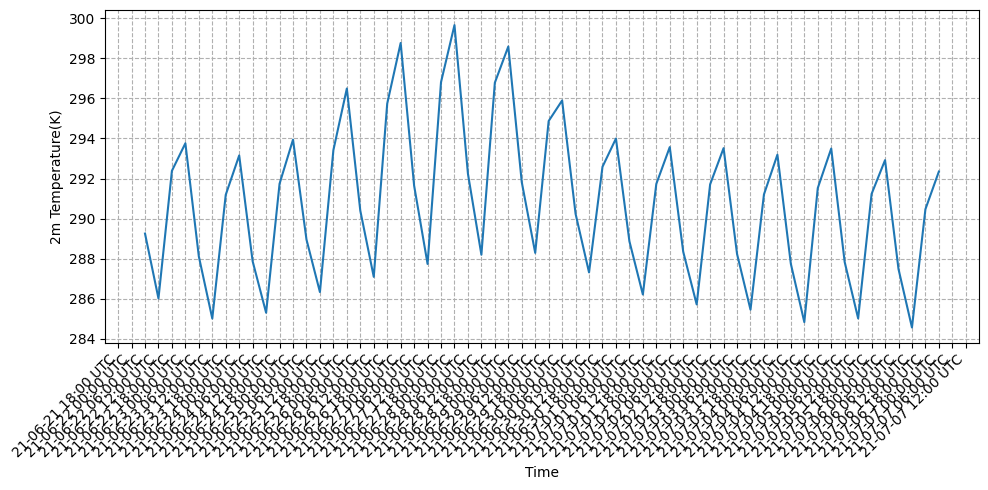

In [19]:
plt.figure(figsize=(10, 5))
time_axis_0614 = ds_fcnv2_ec_cf_2t_box_0622_mean.time
plt.plot(time_axis_0614,ds_fcnv2_ec_cf_2t_box_0622_mean)

# Formatting x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Time')
plt.ylabel('2m Temperature(K)')

locator = mdates.HourLocator(interval=6)  # Every other tick corresponds to 12 hours
plt.gca().xaxis.set_major_locator(locator)

plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%y-%m-%d %H:%M UTC'))
#tick_interval = 1  # hours
#tick_locations = [time_axis[i] for i in range(0, len(time_axis), tick_interval)]
#tick_labels = [tick('%y-%m-%d %H:%M UTC') for tick in tick_locations]
#plt.xticks(tick_locations)
plt.grid(linestyle='--')


plt.tight_layout()
plt.show()

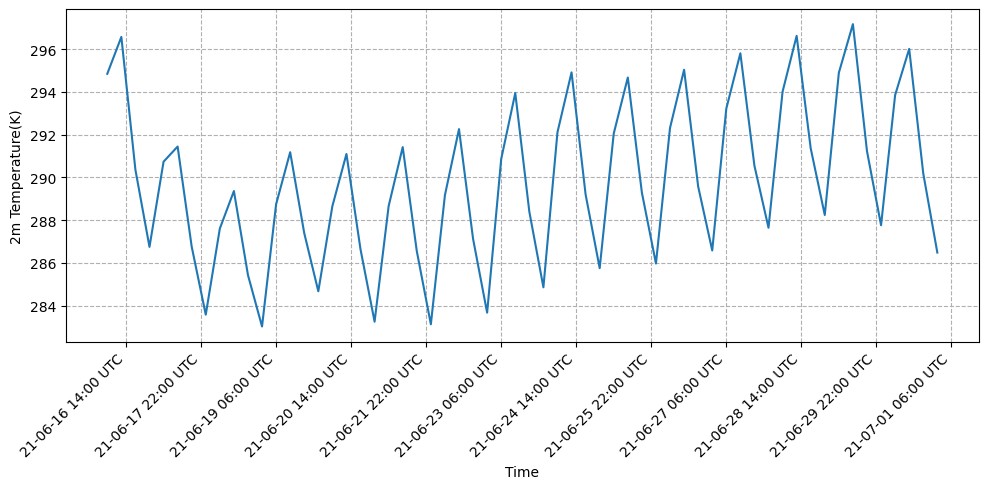

In [14]:
plt.figure(figsize=(10, 5))
time_axis = ds_fcnv2_ec_cf_2t_box_0616_mean.time
plt.plot(time_axis,ds_fcnv2_ec_cf_2t_box_0616_mean)

# Formatting x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Time')
plt.ylabel('2m Temperature(K)')

locator = mdates.HourLocator(interval=32)  # Every other tick corresponds to 12 hours
plt.gca().xaxis.set_major_locator(locator)

plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%y-%m-%d %H:%M UTC'))
#tick_interval = 1  # hours
#tick_locations = [time_axis[i] for i in range(0, len(time_axis), tick_interval)]
#tick_labels = [tick('%y-%m-%d %H:%M UTC') for tick in tick_locations]
#plt.xticks(tick_locations)
plt.grid(linestyle='--')


plt.tight_layout()
plt.show()

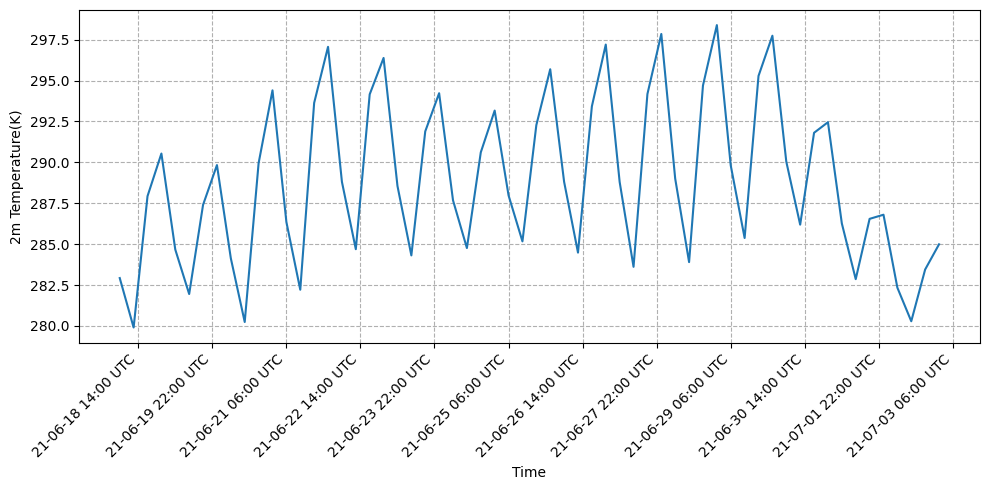

In [71]:
plt.figure(figsize=(10, 5))
time_axis = ds_fcnv2_ec_cf_2t_landbox_0618_mean.time
plt.plot(time_axis,ds_fcnv2_ec_cf_2t_landbox_0618_mean)

# Formatting x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Time')
plt.ylabel('2m Temperature(K)')

locator = mdates.HourLocator(interval=32)  # Every other tick corresponds to 12 hours
plt.gca().xaxis.set_major_locator(locator)

plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%y-%m-%d %H:%M UTC'))
#tick_interval = 1  # hours
#tick_locations = [time_axis[i] for i in range(0, len(time_axis), tick_interval)]
#tick_labels = [tick('%y-%m-%d %H:%M UTC') for tick in tick_locations]
#plt.xticks(tick_locations)
plt.grid(linestyle='--')


plt.tight_layout()
plt.show()

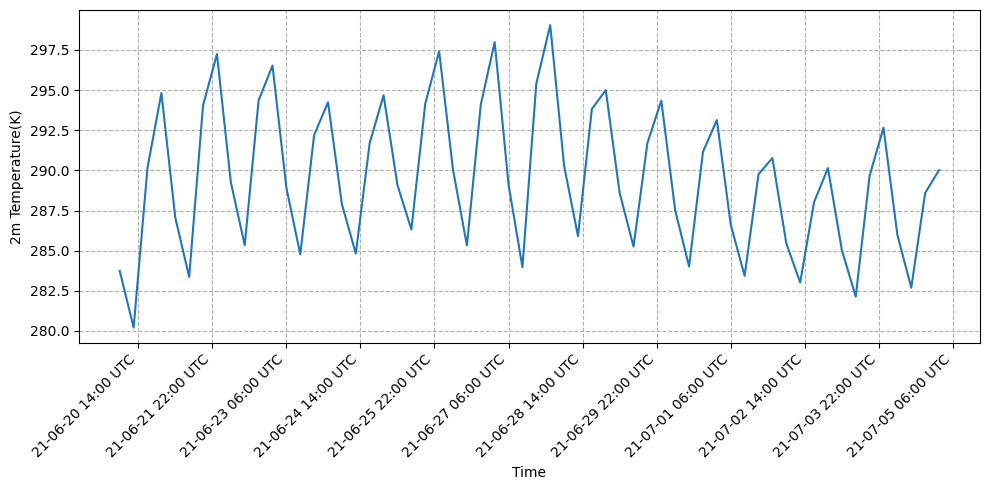

In [72]:
plt.figure(figsize=(10, 5))
time_axis = ds_fcnv2_ec_cf_2t_landbox_0620_mean.time
plt.plot(time_axis,ds_fcnv2_ec_cf_2t_landbox_0620_mean)

# Formatting x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Time')
plt.ylabel('2m Temperature(K)')

locator = mdates.HourLocator(interval=32)  # Every other tick corresponds to 12 hours
plt.gca().xaxis.set_major_locator(locator)

plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%y-%m-%d %H:%M UTC'))
#tick_interval = 1  # hours
#tick_locations = [time_axis[i] for i in range(0, len(time_axis), tick_interval)]
#tick_labels = [tick('%y-%m-%d %H:%M UTC') for tick in tick_locations]
#plt.xticks(tick_locations)
plt.grid(linestyle='--')


plt.tight_layout()
plt.show()

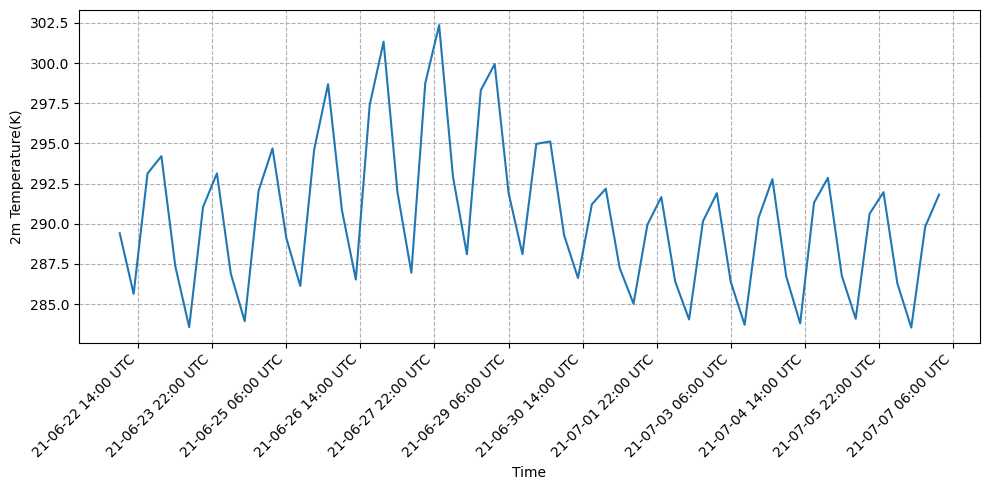

In [73]:
plt.figure(figsize=(10, 5))
time_axis = ds_fcnv2_ec_cf_2t_landbox_0622_mean.time
plt.plot(time_axis,ds_fcnv2_ec_cf_2t_landbox_0622_mean)

# Formatting x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Time')
plt.ylabel('2m Temperature(K)')

locator = mdates.HourLocator(interval=32)  # Every other tick corresponds to 12 hours
plt.gca().xaxis.set_major_locator(locator)

plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%y-%m-%d %H:%M UTC'))
#tick_interval = 1  # hours
#tick_locations = [time_axis[i] for i in range(0, len(time_axis), tick_interval)]
#tick_labels = [tick('%y-%m-%d %H:%M UTC') for tick in tick_locations]
#plt.xticks(tick_locations)
plt.grid(linestyle='--')


plt.tight_layout()
plt.show()

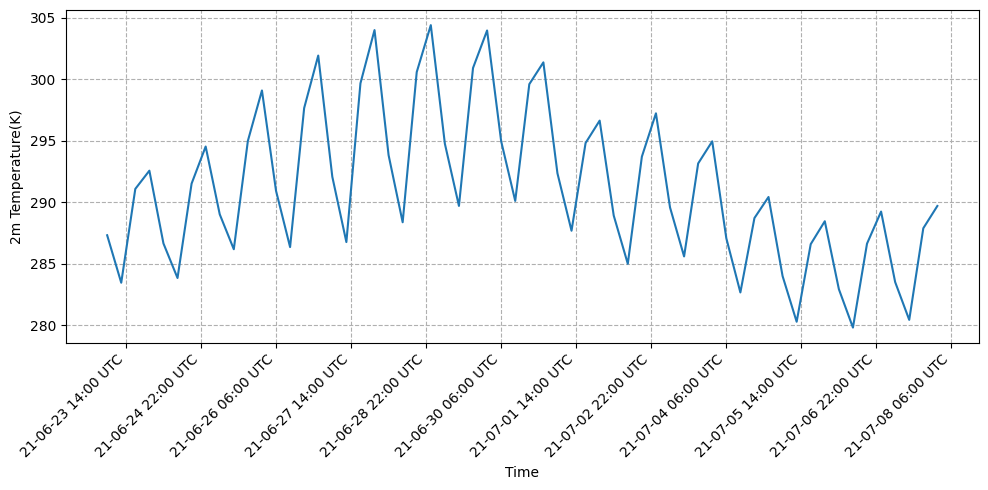

In [74]:
plt.figure(figsize=(10, 5))
time_axis = ds_fcnv2_ec_cf_2t_landbox_0623_mean.time
plt.plot(time_axis,ds_fcnv2_ec_cf_2t_landbox_0623_mean)

# Formatting x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Time')
plt.ylabel('2m Temperature(K)')

locator = mdates.HourLocator(interval=32)  # Every other tick corresponds to 12 hours
plt.gca().xaxis.set_major_locator(locator)

plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%y-%m-%d %H:%M UTC'))
#tick_interval = 1  # hours
#tick_locations = [time_axis[i] for i in range(0, len(time_axis), tick_interval)]
#tick_labels = [tick('%y-%m-%d %H:%M UTC') for tick in tick_locations]
#plt.xticks(tick_locations)
plt.grid(linestyle='--')


plt.tight_layout()
plt.show()

In [ ]:
############################################ read ecmwf ifs data #######################################

In [22]:
def read_and_choose_variable_ec(directory, filename_pattern, variable_name, level ):
    # Read data and choose the variable
    files = sorted([f for f in os.listdir(directory) if re.match(filename_pattern, f)])
    variable_data_list = []

    for file in files:
        file_path = os.path.join(directory, file)
        ds = xr.open_dataset(file_path)
        if level is not None:
            variable_data = ds[variable_name][:, level, :, :]
        else:
            variable_data = ds[variable_name]

        variable_data_list.append(variable_data)

    ds_variable_na = xr.DataArray(variable_data_list)

    return ds_variable_na

In [23]:
#read data and choose variable----t850
directory = '/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/'
filename_pattern = r'fc_cf_\d{8}_\d{2}_sfc\.nc'
variable_name = 't2m'
level = None  # 850hpa
ds_ec_t2m_na = read_and_choose_variable_ec(directory, filename_pattern, variable_name,level)
#ds_ec_z500_na_0629
#choose the box
ds_ec_t2m=ds_ec_t2m_na[:,:,0:220,0:480]

In [24]:
ds_ec_t2m_box = ds_ec_t2m[:,:,79:159,194:274]
ds_ec_t2m_box_mean = np.mean(ds_ec_t2m_box,axis=(-1,-2))

In [25]:
ds_ec_t2m_box_mean_0614 = ds_ec_t2m_box_mean[0,:]
ds_ec_t2m_box_mean_0616 = ds_ec_t2m_box_mean[2,:]
ds_ec_t2m_box_mean_0618 = ds_ec_t2m_box_mean[4,:]
ds_ec_t2m_box_mean_0620 = ds_ec_t2m_box_mean[6,:]
ds_ec_t2m_box_mean_0622 = ds_ec_t2m_box_mean[8,:]
ds_ec_t2m_box_mean_0623 = ds_ec_t2m_box_mean[9,:]

In [26]:
from datetime import datetime, timedelta

# Define start and end time
start_time_0614 = datetime(2021, 6, 14)
start_time_0616 = datetime(2021, 6, 16)
start_time_0618 = datetime(2021, 6, 18)
start_time_0620 = datetime(2021, 6, 20)
start_time_0622 = datetime(2021, 6, 22)
start_time_0623 = datetime(2021, 6, 23)
# Generate time axis with 6-hour intervals
time_axis_0614_ec = [start_time_0614 + timedelta(hours=6*i) for i in range(57)]
time_axis_0616_ec = [start_time_0616 + timedelta(hours=6*i) for i in range(57)]
time_axis_0618_ec = [start_time_0618 + timedelta(hours=6*i) for i in range(57)]
time_axis_0620_ec = [start_time_0620 + timedelta(hours=6*i) for i in range(57)]
time_axis_0622_ec = [start_time_0622 + timedelta(hours=6*i) for i in range(57)]
time_axis_0623_ec = [start_time_0623 + timedelta(hours=6*i) for i in range(57)]

In [27]:
plt.figure(figsize=(10, 5))

plt.plot(time_axis_0614_ec,ds_ec_t2m_landbox_mean_0614)

# Formatting x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Time')
plt.ylabel('2m Temperature(K)')

locator = mdates.HourLocator(interval=12)  # Every other tick corresponds to 12 hours
plt.gca().xaxis.set_major_locator(locator)

plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%y-%m-%d %H:%M UTC'))
#tick_interval = 1  # hours
#tick_locations = [time_axis[i] for i in range(0, len(time_axis), tick_interval)]
#tick_labels = [tick('%y-%m-%d %H:%M UTC') for tick in tick_locations]
#plt.xticks(tick_locations)
plt.grid(linestyle='--')


plt.tight_layout()
plt.show()

NameError: name 'ds_ec_t2m_landbox_mean_0614' is not defined

<Figure size 1000x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(time_axis_0616_ec,ds_ec_t2m_landbox_mean_0616)

# Formatting x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Time')
plt.ylabel('2m Temperature(K)')

locator = mdates.HourLocator(interval=12)  # Every other tick corresponds to 12 hours
plt.gca().xaxis.set_major_locator(locator)

plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%y-%m-%d %H:%M UTC'))
#tick_interval = 1  # hours
#tick_locations = [time_axis[i] for i in range(0, len(time_axis), tick_interval)]
#tick_labels = [tick('%y-%m-%d %H:%M UTC') for tick in tick_locations]
#plt.xticks(tick_locations)
plt.grid(linestyle='--')


plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(time_axis_0618_ec,ds_ec_t2m_landbox_mean_0618)

# Formatting x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Time')
plt.ylabel('2m Temperature(K)')

locator = mdates.HourLocator(interval=12)  # Every other tick corresponds to 12 hours
plt.gca().xaxis.set_major_locator(locator)

plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%y-%m-%d %H:%M UTC'))
#tick_interval = 1  # hours
#tick_locations = [time_axis[i] for i in range(0, len(time_axis), tick_interval)]
#tick_labels = [tick('%y-%m-%d %H:%M UTC') for tick in tick_locations]
#plt.xticks(tick_locations)
plt.grid(linestyle='--')


plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(time_axis_0620_ec,ds_ec_t2m_landbox_mean_0620)

# Formatting x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Time')
plt.ylabel('2m Temperature(K)')

locator = mdates.HourLocator(interval=12)  # Every other tick corresponds to 12 hours
plt.gca().xaxis.set_major_locator(locator)

plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%y-%m-%d %H:%M UTC'))
#tick_interval = 1  # hours
#tick_locations = [time_axis[i] for i in range(0, len(time_axis), tick_interval)]
#tick_labels = [tick('%y-%m-%d %H:%M UTC') for tick in tick_locations]
#plt.xticks(tick_locations)
plt.grid(linestyle='--')


plt.tight_layout()
plt.show()

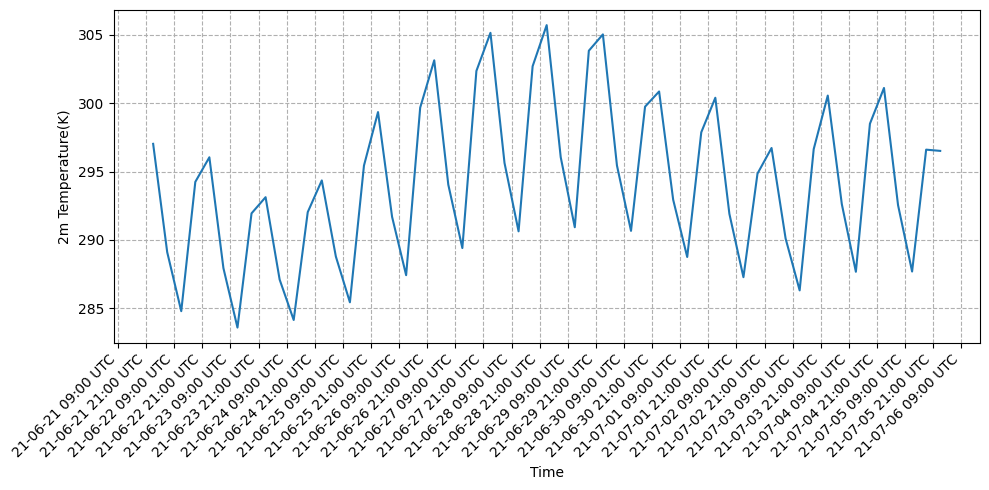

In [152]:
plt.figure(figsize=(10, 5))

plt.plot(time_axis_0622_ec,ds_ec_t2m_landbox_mean_0622)

# Formatting x-axis labels
plt.xticks(rotation=45, ha='right')
plt.xlabel('Time')
plt.ylabel('2m Temperature(K)')

locator = mdates.HourLocator(interval=12)  # Every other tick corresponds to 12 hours
plt.gca().xaxis.set_major_locator(locator)

plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%y-%m-%d %H:%M UTC'))
#tick_interval = 1  # hours
#tick_locations = [time_axis[i] for i in range(0, len(time_axis), tick_interval)]
#tick_labels = [tick('%y-%m-%d %H:%M UTC') for tick in tick_locations]
#plt.xticks(tick_locations)
plt.grid(linestyle='--')


plt.tight_layout()
plt.show()

In [ ]:
#################################### load fcnv1 ########################################################

In [59]:
ds_fcn_era = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/2021_dt_list_ens_backtransformed.nc',engine = 'netcdf4')

In [60]:
ds_fcn_era

<xarray.Dataset>
Dimensions:      (phony_dim_3: 21, phony_dim_0: 21, phony_dim_1: 51,
                  phony_dim_2: 57, phony_dim_4: 220, phony_dim_5: 480)
Coordinates:
  * phony_dim_3  (phony_dim_3) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19 0
  * phony_dim_0  (phony_dim_0) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19 20
  * phony_dim_1  (phony_dim_1) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49 50
  * phony_dim_2  (phony_dim_2) int64 0 1 2 3 4 5 6 7 ... 49 50 51 52 53 54 55 56
  * phony_dim_4  (phony_dim_4) int64 0 1 2 3 4 5 6 ... 214 215 216 217 218 219
  * phony_dim_5  (phony_dim_5) int64 0 1 2 3 4 5 6 ... 474 475 476 477 478 479
Data variables:
    forecast     (phony_dim_0, phony_dim_1, phony_dim_2, phony_dim_3, phony_dim_4, phony_dim_5) float64 ...